This is an attempt pipeline for 3D Cut, Copy and Paste Procedure. The pipeline mainly includes three parts: object segmentation, 3d reconstruction and spatial anchor alignment renderer.

The inputs of the algorithm contains too parts, one .jpg image for target object and a video sequence for target scene (includes the AprilTag anchor).

For inspecting details of input data, please see inspect_data.ipynb

Note: this code should run on Python 2.xx on Ubuntu, GPU required.

**Installation**

In [1]:
!pip install -r requirements.txt

DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7. More details about Python 2 support in pip, can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support
  Using cached https://files.pythonhosted.org/packages/03/8e/2424c0e65c4a066e28f539364deee49b6451f8fcd4f718fefa50cc3dcf48/backports.functools_lru_cache-1.5-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/14/ef/8fb81a8ebde3eb113a412a7548afb0b19c7d1793992039f4be26b2074e81/cffi-1.14.0-cp27-cp27m-macosx_10_9_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/6a/18/0f2910c581682ecfd25e304b231ca73bf2415051301fb28e3d926c7d93ab/chainer-4.2.0.tar.gz
  Using cached https://files.pythonhosted.org/packages/c6/d9/d45cdb70f3d86480f02f220bc2ec6da69a45de4a5bb61a49fd4a5106ada8/cloudpickle-1.0.0-py2.py3-none-any.whl
  

Please install neural renderer:

```
!git clone https://github.com/hiroharu-kato/neural_renderer.git
!cd neural_renderer
!python setup.py install --user
!cd ..
```

**Pretrained model**

A [pretrained model for segmentation](https://github.com/milesial/Pytorch-UNet/releases/tag/v1.0) 
and [3D Reconstruction model](https://drive.google.com/file/d/1hdD2HxTtw3D1SWOl2J4LEkysX61JmX2y/view?usp=sharing) are available. Download models from the links and put them in to models/.

**Pipeline part 1**

In [9]:
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import predict
from mesh_reconstruction import reconstruct


ImportError: No module named cupy

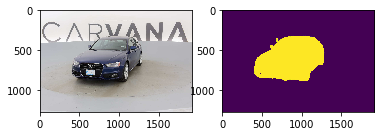

In [11]:
target_obj_img = 'data/image.jpg'
target_mask = 'data/image_mask.jpg'

# predict target image mask
# predict.predict_mask(target_obj_img, target_mask)

img = mpimg.imread(target_obj_img)
img_mask = mpimg.imread(target_mask)
f = plt.figure()
f.add_subplot(1,2, 1)
plt.imshow(img)
f.add_subplot(1,2, 2)
plt.imshow(img_mask)
plt.show()

Generate transparent png file from image and output mask as input for single image 3d reconstruction. -- 64 * 64 size object without background.

In [ ]:
im_rgb = Image.open('data/image.jpg')

im_a = Image.open('data/image_mask.jpg').convert('L').resize(im_rgb.size)
im_rgba = im_rgb.copy()
im_rgba.putalpha(im_a)

left = 222
top = 0
right = 1502
bottom = 1280

im1 = im_rgba.crop((left, top, right, bottom))
im1 = im1.resize((64, 64))
im1.save('data/3d_input.png')

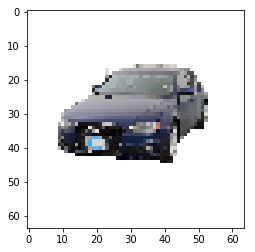

In [12]:
img = mpimg.imread('data/3d_input.png')
plt.imshow(img)
plt.show()

**3D Reconstruction**

In [ ]:
reconstruct.run()

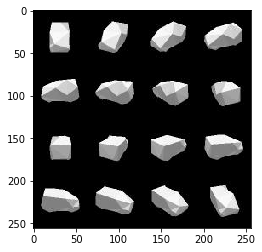

In [13]:
img = mpimg.imread('data/output_3d.jpg')
plt.imshow(img)
plt.show()

Please see the generated obj file in the data/ path with meshlab or other 3d viewer.

The first half of our pipeline is completed. Unfortunately, as we explored, the renderer dependencies are not compatible with Python 2. Thus our render part will be in another notebbook.

---

